# Investigate Average SPEAR-LE Climatological Bias
Comparison between average climatologies of the Livneh dataset and th SPEAR-LE ensemble
Goals:
 - Compare average SWE, P, and T conditions between Livneh and SPEAR 
 - Look at spread - how does the 5%-th and 95%-th ensemble members compare with the Livneh average?

In [1]:
# basic imports for geospatial analysis
from imports import *
lat_new = np.arange(32, 52, 0.5)
lon_new = np.arange(235, 255, 0.5)

In [2]:
# lat lon for WUS, ensemble filenames
plt.style.use("fivethirtyeight")

# get snow cmap
bias_cmap = matplotlib.cm.get_cmap('RdBu')
#snow_cmap.set_bad(color='gray')

# get states
states = cfeature.NaturalEarthFeature(category='cultural',
                                     name='admin_1_states_provinces_shp',
                                     scale='50m',
                                     facecolor='none',
                                     edgecolor='black',
                                     linewidth=1)

# get HUC2 regions 
HUC2 = ShapelyFeature(Reader("/work/Julian.Schmitt/data/shape/huc2_regions.shp").geometries(),
                             crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1.5)


# ensemble_members = glob("/decp/SPEAR_MED/SPEAR_c192_o1_Hist_AllForc_IC1921_K50/"
#                         "pp_ens_*/land/ts/monthly/94yr/land.192101-201412.snow.nc")

## Computation
We compute an average climatology for each of the 30 ensemble members for S, P, & T - analysis is able to do one file every ~30 seconds. Could try and run in parallel for speedup.

In [3]:
def is_winter(month):
    return (month <=4) | (month >=10)
def average_winter_climatology(ensemble_filename):
    # open dataset with lazy loading, select intersect with livneh ds
    ds = xr.open_mfdataset(ensemble_filename).sel(time=slice("1921", "2011"))
    index = ensemble_filename.split("/")[4].split("_")[-1] # get ensemble member # from filename

    # reindex to WUS grid, resample to monthly timescale
    ds = ds.reindex(lat =lat_new, lon=lon_new, method="nearest").resample(time="1M").mean()

    # get average climatology by taking mean
    ds = ds.sel(time=is_winter(ds['time.month'])).mean('time')

    # save file
    save_hist_nc(ds, index)
    return ds
    
def save_hist_nc(hist_ens, index):
    try: ncfile.close()  # just to be safe, make sure dataset is not already open.
    except: pass
    ncfile             = Dataset(f'/work/Julian.Schmitt/data/climatology/ensemble/ens_{index}_climatology.nc',
                                mode='w',format='NETCDF4') 
    # create dimension 
    lat_dim           = ncfile.createDimension('lat', 40)     
    lon_dim           = ncfile.createDimension('lon', 40)    
    for dim in ncfile.dimensions.items():
        print(dim)
    # generate header
    ncfile.title       ='Average Snow Climatology from SPEAR'
    # define variables 
    lat               = ncfile.createVariable('lat', np.float32, ('lat',))
    lat.units         = 'degrees'
    lat.long_name     = 'latitude'
    lon               = ncfile.createVariable('lon', np.float32, ('lon',))
    lon.units         = 'degrees'
    lon.long_name     = 'longitude'
    snow               = ncfile.createVariable('snow', np.float64,('lat','lon')) # note: unlimited dimension is leftmost
    snow.units         = 'SWE (mm)' 
    snow.standard_name = 'Snow'  
    print(snow)
    # write data into matrix
    lat[:]   = np.array(hist_ens.lat)
    lon[:]   = np.array(hist_ens.lon)
    snow[:,:] = np.squeeze(np.array(hist_ens.snow))
    #save data and close the file
    ncfile.close(); print('Dataset is closed!')

In [7]:
%%time
[average_winter_climatology(f) for f in ensemble_members]

('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 snow(lat, lon)
    units: SWE (mm)
    standard_name: Snow
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dataset is closed!
CPU times: user 15min 15s, sys: 53.7 s, total: 16min 9s
Wall time: 16min 27s


[<xarray.Dataset>
 Dimensions:     (bnds: 2, lat: 40, lon: 40)
 Coordinates:
   * lat         (lat) float64 32.0 32.5 33.0 33.5 34.0 ... 50.0 50.5 51.0 51.5
   * lon         (lon) float64 235.0 235.5 236.0 236.5 ... 253.5 254.0 254.5
   * bnds        (bnds) float64 1.0 2.0
 Data variables:
     average_DT  timedelta64[ns] dask.array<chunksize=(), meta=np.ndarray>
     lat_bnds    (lat, bnds) float64 dask.array<chunksize=(40, 2), meta=np.ndarray>
     lon_bnds    (lon, bnds) float64 dask.array<chunksize=(40, 2), meta=np.ndarray>
     snow        (lat, lon) float32 dask.array<chunksize=(40, 40), meta=np.ndarray>
     time_bnds   (bnds) timedelta64[ns] dask.array<chunksize=(2,), meta=np.ndarray>,
 <xarray.Dataset>
 Dimensions:     (bnds: 2, lat: 40, lon: 40)
 Coordinates:
   * lat         (lat) float64 32.0 32.5 33.0 33.5 34.0 ... 50.0 50.5 51.0 51.5
   * lon         (lon) float64 235.0 235.5 236.0 236.5 ... 253.5 254.0 254.5
   * bnds        (bnds) float64 1.0 2.0
 Data variables:
     a

# Precipitation Climatology Computation
We adjust the naming scheme for each ensemble measurement file - hence the repeating function definitions

In [20]:
def average_winter_climatology(ensemble_filename):
    tstart = time.time()
    # open dataset with lazy loading, select intersect with livneh ds
    ds = xr.open_mfdataset(ensemble_filename).sel(time=slice("1921", "2011"))
    index = ensemble_filename.split("/")[4].split("_")[-1] # get ensemble member # from filename

    # reindex to WUS grid, resample to monthly timescale
    ds = ds.reindex(lat =lat_new, lon=lon_new, method="nearest").resample(time="1M").mean()

    # get average climatology by taking mean
    ds = ds.sel(time=is_winter(ds['time.month'])).mean('time')

    # save file
    save_hist_nc(ds, index)
    
    # print time summary
    elapsed = time.time()-tstart
    print(f"Ensemble member {index} processed in {elapsed:.4f} seconds.")
    return ds
# Need custom save file     
def save_hist_nc(hist_ens, index):
    try: ncfile.close()  # just to be safe, make sure dataset is not already open.
    except: pass
    ncfile             = Dataset(f'/work/Julian.Schmitt/data/climatology/ensemble/prec/ens_{index}_climatology.nc',
                                mode='w',format='NETCDF4') 
    # create dimension 
    lat_dim           = ncfile.createDimension('lat', 40)     
    lon_dim           = ncfile.createDimension('lon', 40)    

    # generate header
    ncfile.title       ='Average Precipitation Climatology from SPEAR'
    # define variables 
    lat               = ncfile.createVariable('lat', np.float32, ('lat',))
    lat.units         = 'degrees'
    lat.long_name     = 'latitude'
    lon               = ncfile.createVariable('lon', np.float32, ('lon',))
    lon.units         = 'degrees'
    lon.long_name     = 'longitude'
    precip               = ncfile.createVariable('prec', np.float64,('lat','lon')) # note: unlimited dimension is leftmost
    precip.units         = 'mm' 
    precip.standard_name = 'precip'  
    #print(snow)
    # write data into matrix
    lat[:]   = np.array(hist_ens.lat)
    lon[:]   = np.array(hist_ens.lon)
    precip[:,:] = np.squeeze(np.array(hist_ens.precip))
    #save data and close the file
    ncfile.close(); print('Dataset is closed!')

In [21]:
# precip files
ensemble_precip = glob("/decp/SPEAR_MED/SPEAR_c192_o1_Hist_AllForc_IC1921_K50/pp_ens_*/atmos/"
                       "ts/monthly/94yr/atmos.192101-201412.precip.nc")

In [23]:
# try running in parallel - works super! 
from joblib import Parallel, delayed
prec_avg = Parallel(n_jobs=15)(delayed(average_winter_climatology)(f) for f in ensemble_precip)

# TMAX

In [26]:
# Need custom save file     
def save_hist_nc(hist_ens, index):
    try: ncfile.close()  # just to be safe, make sure dataset is not already open.
    except: pass
    ncfile             = Dataset(f'/work/Julian.Schmitt/data/climatology/ensemble/tmax/ens_{index}_climatology.nc',
                                mode='w',format='NETCDF4') 
    # create dimension 
    lat_dim           = ncfile.createDimension('lat', 40)     
    lon_dim           = ncfile.createDimension('lon', 40)    

    # generate header
    ncfile.title       ='Average Max Temperature Climatology from SPEAR'
    # define variables 
    lat               = ncfile.createVariable('lat', np.float32, ('lat',))
    lat.units         = 'degrees'
    lat.long_name     = 'latitude'
    lon               = ncfile.createVariable('lon', np.float32, ('lon',))
    lon.units         = 'degrees'
    lon.long_name     = 'longitude'
    tmax               = ncfile.createVariable('tmax', np.float64,('lat','lon')) # note: unlimited dimension is leftmost
    tmax.units         = 'Celsius' 
    tmax.standard_name = 'average daily max temperature'  
    #print(snow)
    # write data into matrix
    lat[:]   = np.array(hist_ens.lat)
    lon[:]   = np.array(hist_ens.lon)
    tmax[:,:] = np.squeeze(np.array(hist_ens.t_ref_max))
    #save data and close the file
    ncfile.close(); print('Dataset is closed!')

In [33]:
ensemble_tmax = glob("/decp/SPEAR_MED/SPEAR_c192_o1_Hist_AllForc_IC1921_K50/pp_ens_*/atmos/"
                       "ts/monthly/94yr/atmos.192101-201412.t_ref_max.nc")

In [28]:
%%time
tmax = Parallel(n_jobs=15)(delayed(average_winter_climatology)(f) for f in ensemble_tmax)

CPU times: user 41.2 s, sys: 3.68 s, total: 44.9 s
Wall time: 1min 52s


# TMIN

In [30]:
# Need custom save file     
def save_hist_nc(hist_ens, index):
    try: ncfile.close()  # just to be safe, make sure dataset is not already open.
    except: pass
    ncfile             = Dataset(f'/work/Julian.Schmitt/data/climatology/ensemble/tmin/ens_{index}_climatology.nc',
                                mode='w',format='NETCDF4') 
    # create dimension 
    lat_dim           = ncfile.createDimension('lat', 40)     
    lon_dim           = ncfile.createDimension('lon', 40)    

    # generate header
    ncfile.title       ='Average Min Temperature Climatology from SPEAR'
    # define variables 
    lat               = ncfile.createVariable('lat', np.float32, ('lat',))
    lat.units         = 'degrees'
    lat.long_name     = 'latitude'
    lon               = ncfile.createVariable('lon', np.float32, ('lon',))
    lon.units         = 'degrees'
    lon.long_name     = 'longitude'
    tmin               = ncfile.createVariable('tmin', np.float64,('lat','lon')) # note: unlimited dimension is leftmost
    tmin.units         = 'Celsius' 
    tmin.standard_name = 'average daily min temperature'  
    #print(snow)
    # write data into matrix
    lat[:]   = np.array(hist_ens.lat)
    lon[:]   = np.array(hist_ens.lon)
    tmin[:,:] = np.squeeze(np.array(hist_ens.t_ref_min))
    #save data and close the file
    ncfile.close(); print('Dataset is closed!')

In [32]:
ensemble_tmin = glob("/decp/SPEAR_MED/SPEAR_c192_o1_Hist_AllForc_IC1921_K50/pp_ens_*/atmos/"
                       "ts/monthly/94yr/atmos.192101-201412.t_ref_min.nc")

In [34]:
%%time
tmin = Parallel(n_jobs=15)(delayed(average_winter_climatology)(f) for f in ensemble_tmin)

CPU times: user 51.8 s, sys: 4.85 s, total: 56.7 s
Wall time: 2min 16s


# Compare Livneh and SPEAR
We compute the ensemble mean for the SPEAR LE, and then take the difference between SPEAR and Livneh, plotting a map of the west to see biases by region

In [4]:
%%time
# snow -- ensemble
ens_snow_files = glob("/work/Julian.Schmitt/data/climatology/ensemble/snow/*.nc")
ens_snow_mean = sum([xr.open_dataset(f)["snow"] for f in ens_snow_files])/len(ens_snow_files)

CPU times: user 116 ms, sys: 26 ms, total: 142 ms
Wall time: 605 ms


In [4]:
# sum(var*cos(lat))/sum(cos(lat))

In [7]:
liv_clim = xr.open_dataset("/work/Julian.Schmitt/data/climatology/livneh/livneh_swe_average_climatology.nc")


In [12]:
spear_bias = ens_snow_mean-liv_clim.swe

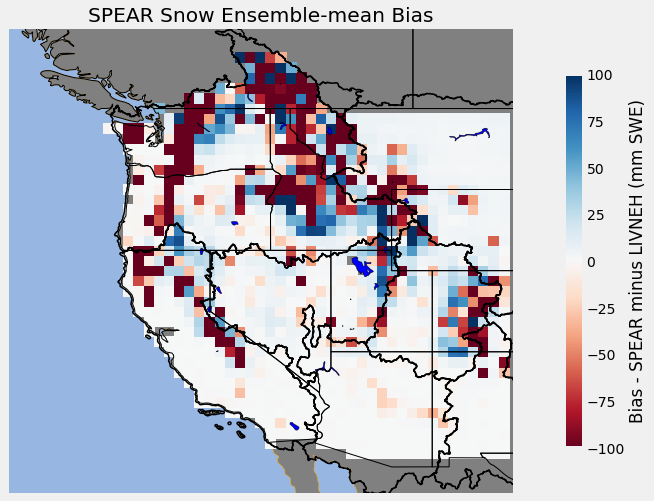

In [27]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))

# get snow cmap
bias_cmap = matplotlib.cm.get_cmap('RdBu')
#snow_cmap.set_bad(color='gray')

# get states
states = cfeature.NaturalEarthFeature(category='cultural',
                                     name='admin_1_states_provinces_shp',
                                     scale='50m',
                                     facecolor='none',
                                     edgecolor='black',
                                     linewidth=1)

# get HUC2 regions 
HUC2 = ShapelyFeature(Reader("/work/Julian.Schmitt/data/shape/huc2_regions.shp").geometries(),
                             crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1.5)

# load projection
ax = plt.axes(projection=ccrs.PlateCarree())

# add land, lakes, oceans, and HUC2 regions
ax.add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
ax.add_feature(cfeature.OCEAN)
ax.add_feature(HUC2)
# add states 
ax.add_feature(states)



# define new regionmask where values represent drought conditions
# uncomment when doing different year - save computation speed for now

dry = spear_bias.plot(ax=ax, transform = ccrs.PlateCarree(), add_colorbar=False,
         cmap=bias_cmap, vmin=-100, vmax=100)

#cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(cmap=newcmp, ax=ax, cax=cax)


cbar = plt.colorbar(dry, 
                   orientation='vertical',
                   shrink=0.8)
#cbar.ax.set_yticklabels(yticklabels)
cbar.set_label("Bias - SPEAR minus LIVNEH (mm SWE)")


# set extent to Western US
ax.set_extent((-130, -105, 30, 53), crs=ccrs.PlateCarree())

# set plot attributes and labels
ax.set_title(f"SPEAR Snow Ensemble-mean Bias");
plt.savefig("/home/Julian.Schmitt/plots/spear_snow_ens_mean_bias.png", dpi=300)

## Precipitation bias
Hopefully precipitation bias is less than snowfall bias - mountains are just significantly off

In [10]:
# open files - ensemble mean and livneh dataset
# ens_prec_files = glob("/work/Julian.Schmitt/data/climatology/ensemble/prec/*.nc")
# ens_prec_mean = sum([xr.open_dataset(f)["snow"] for f in ens_snow_files])/len(ens_snow_files)

livneh_prec = xr.open_dataset("/work/Julian.Schmitt/data/climatology/livneh/livneh_prec_average_climatology.nc")

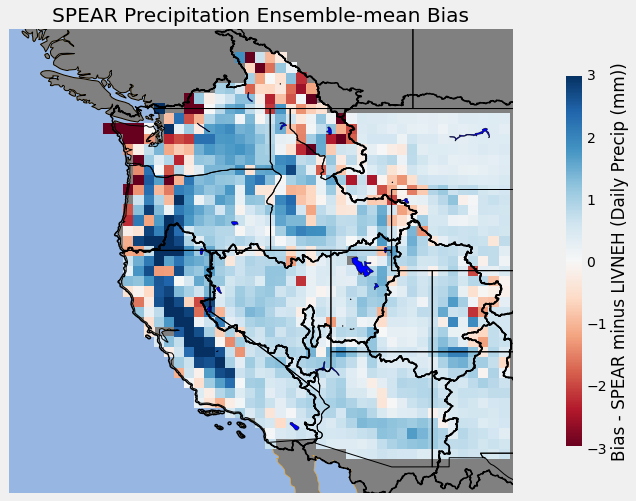

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))

# get snow cmap
bias_cmap = matplotlib.cm.get_cmap('RdBu')
#snow_cmap.set_bad(color='gray')

# get states
states = cfeature.NaturalEarthFeature(category='cultural',
                                     name='admin_1_states_provinces_shp',
                                     scale='50m',
                                     facecolor='none',
                                     edgecolor='black',
                                     linewidth=1)

# get HUC2 regions 
HUC2 = ShapelyFeature(Reader("/work/Julian.Schmitt/data/shape/huc2_regions.shp").geometries(),
                             crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1.5)

# load projection
ax = plt.axes(projection=ccrs.PlateCarree())

# add land, lakes, oceans, and HUC2 regions
ax.add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
ax.add_feature(cfeature.OCEAN)
ax.add_feature(HUC2)
# add states 
ax.add_feature(states)



# define new regionmask where values represent drought conditions
# uncomment when doing different year - save computation speed for now

dry = (ens_mean-livneh_prec.prec).plot(ax=ax, transform = ccrs.PlateCarree(), add_colorbar=False,
         cmap=bias_cmap, vmin=-3, vmax=3)

#cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(cmap=newcmp, ax=ax, cax=cax)


cbar = plt.colorbar(dry, 
                   orientation='vertical',
                   shrink=0.8)
#cbar.ax.set_yticklabels(yticklabels)
cbar.set_label("Bias - SPEAR minus LIVNEH (Daily Precip (mm))")


# set extent to Western US
ax.set_extent((-130, -105, 30, 53), crs=ccrs.PlateCarree())

# set plot attributes and labels
ax.set_title(f"SPEAR Precipitation Ensemble-mean Bias");
plt.savefig("/home/Julian.Schmitt/plots/spear_prec_ens_mean_bias.png", dpi=300)

In [30]:
plt.imshow(ens_prec_mean)

<xarray.DataArray 'snow' (lat: 40, lon: 40)>
array([[           nan,            nan,            nan, ...,
        1.02723752e-01, 1.37775555e-01, 2.38360744e-01],
       [           nan,            nan,            nan, ...,
        1.70288918e-01, 2.89774994e-01, 5.45088760e-01],
       [           nan,            nan,            nan, ...,
        2.34753438e-01, 3.76568751e-01, 7.19098528e-01],
       ...,
       [1.42409208e+02, 1.42409208e+02, 4.75072763e+02, ...,
        1.02122832e+01, 1.00705515e+01, 1.20694530e+01],
       [5.57267342e+02, 5.57267342e+02, 3.72444652e+02, ...,
        1.20855579e+01, 1.36102263e+01, 1.52928233e+01],
       [1.94731158e+02, 1.94731158e+02, 7.23398099e+01, ...,
        1.43437764e+01, 1.61083560e+01, 1.79146665e+01]])
Coordinates:
  * lat      (lat) float32 32.0 32.5 33.0 33.5 34.0 ... 49.5 50.0 50.5 51.0 51.5
  * lon      (lon) float32 235.0 235.5 236.0 236.5 ... 253.0 253.5 254.0 254.5

In [34]:
test = xr.open_dataset("/decp/SPEAR_MED/SPEAR_c192_o1_Hist_AllForc_IC1921_K50/pp_ens_01/atmos/ts/monthly/94yr/atmos.192101-201412.precip.nc")

In [54]:
testmm = (test.mean("time")*86400).reindex(lat = np.array(ens_prec_mean.lat), lon = np.array(ens_prec_mean.lon), method="nearest")

In [6]:
def get_ens_precip(file):
    ds = xr.open_dataset(file)
    ds = ds.sel(time =is_winter(ds['time.month']))
    ds = (ds.mean('time')*86400).reindex(lat = lat_new, 
                                         lon = lon_new, method="nearest")
    return ds

In [7]:
ensemble_precip = glob("/decp/SPEAR_MED/SPEAR_c192_o1_Hist_AllForc_IC1921_K50/pp_ens_*/atmos/"
                       "ts/monthly/94yr/atmos.192101-201412.precip.nc")
prec_ds = Parallel(n_jobs=15)(delayed(get_ens_precip)(f) for f in ensemble_precip)

In [8]:
ens_mean = sum([ds.precip for ds in prec_ds])/len(prec_ds)

# Temperature

In [8]:
# read files
ens_tmax_files = glob("/work/Julian.Schmitt/data/climatology/ensemble/tmax/*.nc")
livneh_tmax = xr.open_dataset("/work/Julian.Schmitt/data/climatology/livneh/livneh_tmax_average_climatology.nc")

In [9]:
# get tmax data for spear
ens_tmaxs = []
for file in ens_tmax_files:
    try:
        ens_tmaxs.append(xr.open_dataset(file).tmax)
    except AttributeError:
        print(file)


In [10]:
# average ensemble mean and convert from Kelvin
ens_tmax_avg = sum(ens_tmaxs)/len(ens_tmaxs) - 273.15

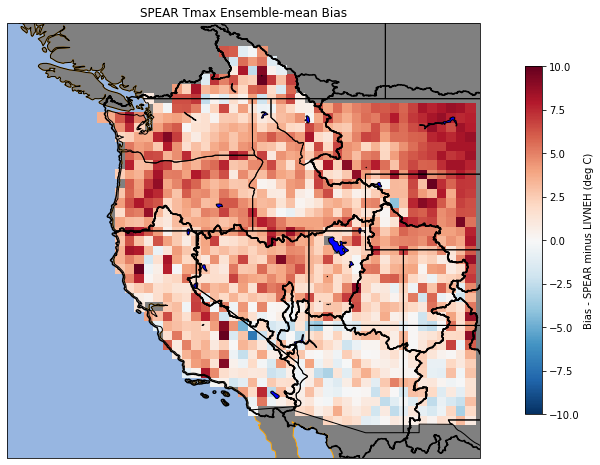

In [12]:
plt.figure(figsize=(16,8))

# get snow cmap
bias_cmap = matplotlib.cm.get_cmap('RdBu_r')
#snow_cmap.set_bad(color='gray')

# get states
states = cfeature.NaturalEarthFeature(category='cultural',
                                     name='admin_1_states_provinces_shp',
                                     scale='50m',
                                     facecolor='none',
                                     edgecolor='black',
                                     linewidth=1)

# # get HUC2 regions 
HUC2 = ShapelyFeature(Reader("/work/Julian.Schmitt/data/shape/huc2_regions.shp").geometries(),
                             crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1.5)

# load projection
ax = plt.axes(projection=ccrs.PlateCarree())

# add land, lakes, oceans, and HUC2 regions
ax.add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
ax.add_feature(cfeature.OCEAN)
ax.add_feature(HUC2)
# add states 
ax.add_feature(states)



# define new regionmask where values represent drought conditions
# uncomment when doing different year - save computation speed for now

dry = (ens_tmax_avg-livneh_tmax.tmax).plot(ax=ax, transform = ccrs.PlateCarree(), add_colorbar=False,
         cmap=bias_cmap, vmin=-10, vmax=10)

#cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(cmap=newcmp, ax=ax, cax=cax)


cbar = plt.colorbar(dry, 
                   orientation='vertical',
                   shrink=0.8)
#cbar.ax.set_yticklabels(yticklabels)
cbar.set_label("Bias - SPEAR minus LIVNEH (deg C)")


# set extent to Western US
ax.set_extent((-130, -105, 30, 53), crs=ccrs.PlateCarree())

# set plot attributes and labels
ax.set_title(f"SPEAR Tmax Ensemble-mean Bias");
plt.savefig("/home/Julian.Schmitt/plots/spear_tmax_ens_mean_bias.png", dpi=300)

# TMIN

In [13]:
#ens_tmin_files = glob("/work/Julian.Schmitt/data/climatology/ensemble/tmin/*.nc")
livneh_tmin = xr.open_dataset("/work/Julian.Schmitt/data/climatology/livneh/livneh_tmin_average_climatology.nc")

In [14]:
def get_ens_tmin(file):
    ds = xr.open_dataset(file)
    ds = ds.sel(time =is_winter(ds['time.month']))
    ds = ds.mean('time').reindex(lat = lat_new, 
                                         lon = lon_new, method="nearest")
    return ds

In [15]:
ensemble_tmin = glob("/decp/SPEAR_MED/SPEAR_c192_o1_Hist_AllForc_IC1921_K50/pp_ens_*/atmos/"
                       "ts/monthly/94yr/atmos.192101-201412.t_ref_min.nc")
tmin_ds = Parallel(n_jobs=15)(delayed(get_ens_tmin)(f) for f in ensemble_tmin)

In [17]:
ens_tmin_avg = sum([ds.t_ref_min for ds in tmin_ds])/len(tmin_ds) - 273.15

In [16]:
ens_tmins = []
for file in ens_tmin_files:
    try:
        ens_tmins.append(xr.open_dataset(file).tmin)
    except AttributeError:
        print(file)
ens_tmin_avg = sum(ens_tmins)/len(ens_tmins) - 273.15

NameError: name 'ens_tmin_files' is not defined

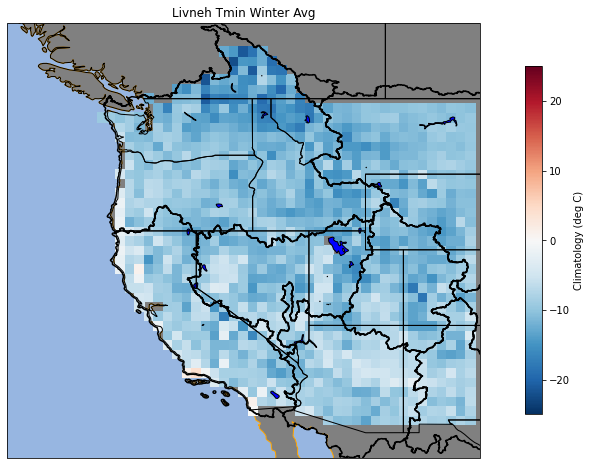

In [18]:
plt.figure(figsize=(16,8))

# get snow cmap
bias_cmap = matplotlib.cm.get_cmap('RdBu_r')
#snow_cmap.set_bad(color='gray')

# get states
# states = cfeature.NaturalEarthFeature(category='cultural',
#                                      name='admin_1_states_provinces_shp',
#                                      scale='50m',
#                                      facecolor='none',
#                                      edgecolor='black',
#                                      linewidth=1)

# # get HUC2 regions 
# HUC2 = ShapelyFeature(Reader("/work/Julian.Schmitt/data/shape/huc2_regions.shp").geometries(),
#                              crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1.5)

# load projection
ax = plt.axes(projection=ccrs.PlateCarree())

# add land, lakes, oceans, and HUC2 regions
ax.add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
ax.add_feature(cfeature.OCEAN)
ax.add_feature(HUC2)
# add states 
ax.add_feature(states)



# define new regionmask where values represent drought conditions
# uncomment when doing different year - save computation speed for now

dry = (ens_tmin_avg - livneh_tmin.tmin).plot(ax=ax, transform = ccrs.PlateCarree(), add_colorbar=False,
         cmap=bias_cmap, vmin=-25, vmax=25)

#cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(cmap=newcmp, ax=ax, cax=cax)


cbar = plt.colorbar(dry, 
                   orientation='vertical',
                   shrink=0.8)
#cbar.ax.set_yticklabels(yticklabels)
#cbar.set_label("Bias - SPEAR minus LIVNEH (deg C)")
cbar.set_label("Climatology (deg C)")

# set extent to Western US
ax.set_extent((-130, -105, 30, 53), crs=ccrs.PlateCarree())

# set plot attributes and labels
ax.set_title(f"Livneh Tmin Winter Avg");
#plt.savefig("/home/Julian.Schmitt/plots/spear_tmin_ens_mean_bias.png", dpi=300)

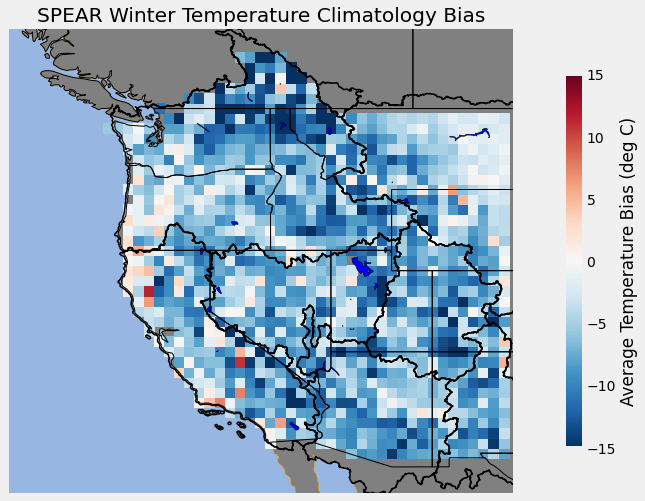

In [51]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))

# get snow cmap
bias_cmap = matplotlib.cm.get_cmap('RdBu_r')
#snow_cmap.set_bad(color='gray')

# get states
# states = cfeature.NaturalEarthFeature(category='cultural',
#                                      name='admin_1_states_provinces_shp',
#                                      scale='50m',
#                                      facecolor='none',
#                                      edgecolor='black',
#                                      linewidth=1)

# # get HUC2 regions 
# HUC2 = ShapelyFeature(Reader("/work/Julian.Schmitt/data/shape/huc2_regions.shp").geometries(),
#                              crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1.5)

# load projection
ax = plt.axes(projection=ccrs.PlateCarree())

# add land, lakes, oceans, and HUC2 regions
ax.add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
ax.add_feature(cfeature.OCEAN)
ax.add_feature(HUC2)
# add states 
ax.add_feature(states)



# define new regionmask where values represent drought conditions
# uncomment when doing different year - save computation speed for now

dry = (ens_tmin_avg +ens_tmax_avg - livneh_tmin.tmin - livneh_tmax.tmax).plot(ax=ax, transform = ccrs.PlateCarree(), add_colorbar=False,
         cmap=bias_cmap, vmin=-15, vmax=15)

#cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(cmap=newcmp, ax=ax, cax=cax)


cbar = plt.colorbar(dry, 
                   orientation='vertical',
                   shrink=0.8)
#cbar.ax.set_yticklabels(yticklabels)
#cbar.set_label("Bias - SPEAR minus LIVNEH (deg C)")
cbar.set_label("Average Temperature Bias (deg C)")

# set extent to Western US
ax.set_extent((-130, -105, 30, 53), crs=ccrs.PlateCarree())

# set plot attributes and labels
ax.set_title(f"SPEAR Winter Temperature Climatology Bias");
plt.savefig("/home/Julian.Schmitt/plots/spear_temp_bias_avg_maxmin.png", dpi=300)

In [30]:
# Try using ERA5 reanalysis dataset to verify these aggregious errors

In [14]:
def simple_temp_plot(data, title="Temperature Bias"):
    plt.figure(figsize=(16,8))

    # get snow cmap
    bias_cmap = matplotlib.cm.get_cmap('RdBu_r')

    # load projection
    ax = plt.axes(projection=ccrs.PlateCarree())

    # add land, lakes, oceans, and HUC2 regions
    ax.add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
    ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(HUC2)
    # add states 
    ax.add_feature(states)


    # define new regionmask where values represent drought conditions
    # uncomment when doing different year - save computation speed for now

    dry = data.plot(ax=ax, transform = ccrs.PlateCarree(), add_colorbar=False,
             cmap=bias_cmap, vmin=-5, vmax=5)

    cbar = plt.colorbar(dry, 
                       orientation='vertical',
                       shrink=0.8)

    cbar.set_label("Historical Temperature Bias (deg C)")

    # set extent to Western US
    ax.set_extent((-130, -105, 30, 53), crs=ccrs.PlateCarree())

    # set plot attributes and labels
    ax.set_title(title);
    return ax
    #plt.savefig("/home/Julian.Schmitt/plots/spear_temp_bias_avg_maxmin.png", dpi=300)

In [20]:
def average_winter_climatology(ensemble_filename):
    tstart = time.time()
    # open dataset with lazy loading, select intersect with livneh ds
    ds = xr.open_mfdataset(ensemble_filename)#.sel(time=slice("1979", "2011"))
    #index = ensemble_filename.split("/")[4].split("_")[-1] # get ensemble member # from filename

    # reindex to WUS grid, resample to monthly timescale
    ds = ds.reindex(lat =lat_new, lon=lon_new, method="nearest").resample(time="1M").mean()

    # get average climatology by taking mean
    ds = ds.sel(time=is_winter(ds['time.month']))#.mean('time')

    # save file
    #save_hist_nc(ds, index)
    
    # print time summary
    elapsed = time.time()-tstart
    print(f"Processed in {elapsed:.4f} seconds.")
    return ds

In [7]:
%%time 
# compute yearly climatological averages
era5_files = glob("/archive/Kai-chi.Tseng/data/ERA5_50km/t2m/*.nc")
era5 = Parallel(n_jobs=os.cpu_count())(delayed(average_winter_climatology)(f) for f in era5_files)

CPU times: user 389 ms, sys: 135 ms, total: 524 ms
Wall time: 23.5 s


In [21]:
era5_winters = xr.concat(era5, dim='time').mean('time')

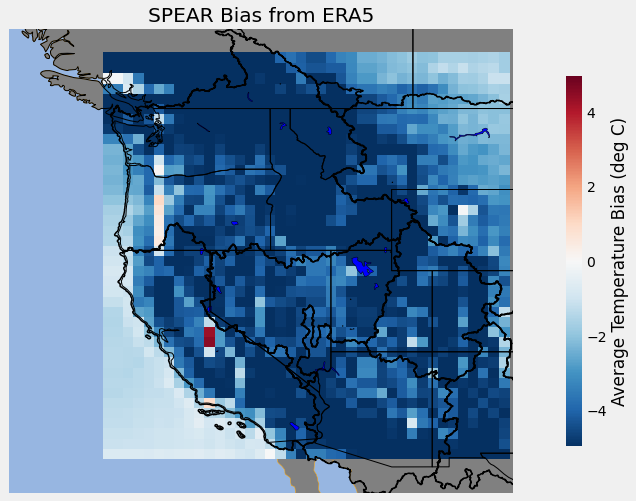

In [70]:
figure = simple_temp_plot((ens_tmin_avg +ens_tmax_avg)/2-(era5_winters.t2m-273.15), title='SPEAR Bias from ERA5')
plt.savefig("/home/Julian.Schmitt/plots/test_spear_era5_bias.png", dpi=250)

## Make Comparisons using identical daily datasets for ERA5, SPEAR, and Livneh

In [3]:
%%time
# compute data for spear
def average_winter_climatology(ensemble_filename):
    tstart = time.time()
    # open dataset with lazy loading, select intersect with livneh ds
    ds = xr.open_mfdataset(ensemble_filename)#.sel(time=slice("1979", "2011"))
    #index = ensemble_filename.split("/")[4].split("_")[-1] # get ensemble member # from filename

    # reindex to WUS grid, resample to monthly timescale
    ds = ds.reindex(lat =lat_new, lon=lon_new, method="nearest")

    # get average climatology by taking mean
    ds = ds.sel(time=is_winter(ds['time.month']))#.mean('time')
    
    # print time summary
    elapsed = time.time()-tstart
    print(f"Processed in {elapsed:.4f} seconds.")
    return ds

ensemble_daily_clim = []
# compute average temperature in an identical fashion for spear - daily average temperatures
for ens in [str(i).zfill(2) for i in range(1,31)]:
    # load and aggregate decadal files
    tstart = time.time()
    spear_temp_daily = glob(f'/decp/SPEAR_MED/SPEAR_c192_o1_Hist_AllForc_IC1921_K50/pp_ens_{ens}/'
                            'atmos_daily/ts/daily/10yr/atmos_daily.*.t_ref.nc')
    spear_t = Parallel(n_jobs=os.cpu_count())(delayed(average_winter_climatology)(f) for f in spear_temp_daily)
    
    # join ensemble files and select era5 time interval 
    temp_spear = xr.concat([f.t_ref for f in spear_t], dim='time').sortby('time')
    
    temp_ens_mean = temp_spear#.sel(time=slice("1921", "2011")).mean('time')
    
    t_elapsed = time.time()-tstart
    print(f"Processed {ens} in {t_elapsed:.2f} seconds.")
    
    ensemble_daily_clim.append(temp_ens_mean)

Processed 01 in 9.54 seconds.
Processed 02 in 4.19 seconds.
Processed 03 in 6.95 seconds.
Processed 04 in 4.15 seconds.
Processed 05 in 4.35 seconds.
Processed 06 in 6.95 seconds.
Processed 07 in 6.71 seconds.
Processed 08 in 6.91 seconds.
Processed 09 in 6.81 seconds.
Processed 10 in 2.38 seconds.
Processed 11 in 6.78 seconds.
Processed 12 in 2.03 seconds.
Processed 13 in 6.63 seconds.
Processed 14 in 7.65 seconds.
Processed 15 in 6.61 seconds.
Processed 16 in 2.44 seconds.
Processed 17 in 2.32 seconds.
Processed 18 in 7.13 seconds.
Processed 19 in 6.58 seconds.
Processed 20 in 6.64 seconds.
Processed 21 in 2.55 seconds.
Processed 22 in 7.65 seconds.
Processed 23 in 6.52 seconds.
Processed 24 in 2.64 seconds.
Processed 25 in 2.84 seconds.
Processed 26 in 7.06 seconds.
Processed 27 in 6.56 seconds.
Processed 28 in 2.78 seconds.
Processed 29 in 2.61 seconds.
Processed 30 in 2.25 seconds.
CPU times: user 6.79 s, sys: 354 ms, total: 7.15 s
Wall time: 2min 37s


In [4]:
# slice spear data for ERA5 and Livneh comparisons
spear_t_forera5 = sum([clim.sel(time=slice("1979", "2014")).mean('time') for clim in ensemble_daily_clim])/30
spear_t_forlivneh = sum([clim.sel(time=slice("1921", "2011")).mean('time') for clim in ensemble_daily_clim])/30

## ERA5 Data 

In [5]:
%%time
# for era5 data (restricted to 1979 and later)
# compute yearly climatological averages
era5_files = glob("/archive/Kai-chi.Tseng/data/ERA5_50km/t2m/*.nc")
era5 = Parallel(n_jobs=os.cpu_count())(delayed(average_winter_climatology)(f) for f in era5_files)
temp_era5 = xr.concat([f.t2m for f in era5], dim='time').sortby('time')

CPU times: user 392 ms, sys: 12 ms, total: 404 ms
Wall time: 18.4 s


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 213 times more chunks
  return self.array[key]


In [6]:
# livneh daily data - 
era5_t_forlivneh = temp_era5.sel(time=is_winter(temp_era5['time.month'])).sel(time=slice("1979", "2011")).mean('time')
era5_t_forSPEAR = temp_era5.sel(time=is_winter(temp_era5['time.month'])).sel(time=slice("1979", "2014")).mean('time')

## Livneh

In [7]:
# read in livneh data and get winter average - aggregate by taking difference of tmax and tmin
from imports import *
liv_tmax = xr.open_dataset("/work/Julian.Schmitt/data/livneh/livneh_tmax_reindexed.nc")
liv_tmin = xr.open_dataset("/work/Julian.Schmitt/data/livneh/livneh_tmin_reindexed.nc")

In [8]:
# select winter (OCT - APR)
tmax_win = liv_tmax.sel(time=is_winter(liv_tmax['time.month']))
tmin_win = liv_tmin.sel(time=is_winter(liv_tmin['time.month']))

In [30]:
%%time
# take mean over time for different slices. resampling just speeds computation
# compute livneh climatology for intersection with spear data
tmax_clim = tmax_win.sel(time=slice("1921", "2011")).resample(time='AS-OCT').mean().mean('time')
tmin_clim = tmin_win.sel(time=slice("1921", "2011")).resample(time='AS-OCT').mean().mean('time')
livneh_for_spear = (tmax_clim.tmax+tmin_clim.tmin)/2 +273.15 # convert to Kelvin

# Compare livneh to ERA5
tmax_clim = tmax_win.sel(time=slice("1979", "2011")).resample(time='AS-OCT').mean().mean('time')
tmin_clim = tmin_win.sel(time=slice("1979", "2011")).resample(time='AS-OCT').mean().mean('time')
livneh_for_era5 = (tmax_clim.tmax+tmin_clim.tmin)/2 +273.15 # convert to Kelvin

CPU times: user 57.7 s, sys: 1.67 s, total: 59.3 s
Wall time: 1min


## Plot differences

In [10]:
def simple_temp_plot(data, vmin = -15, vmax = 15, title="Temperature Bias",
                     cmap_label="Historical Temperature Bias (deg C)", label=int(time.monotonic())):
    plt.figure(figsize=(16,8))

    # get snow cmap
    bias_cmap = matplotlib.cm.get_cmap('RdBu_r')

    # load projection
    ax = plt.axes(projection=ccrs.PlateCarree())

    # add land, lakes, oceans, and HUC2 regions
    ax.add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
    ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(HUC2)
    # add states 
    ax.add_feature(states)


    # define new regionmask where values represent drought conditions
    # uncomment when doing different year - save computation speed for now

    dry = data.plot(ax=ax, transform = ccrs.PlateCarree(), add_colorbar=False,
             cmap=bias_cmap, vmin=vmin, vmax=vmax)

    cbar = plt.colorbar(dry, 
                       orientation='vertical',
                       shrink=0.8)

    cbar.set_label(cmap_label)

    # set extent to Western US
    ax.set_extent((-130, -105, 30, 53), crs=ccrs.PlateCarree())

    # set plot attributes and labels
    ax.set_title(title);
    plt.savefig(f"/home/Julian.Schmitt/plots/quickplot/quick_temp_{label}.png", dpi=200)
    return ax

In [ ]:
%%time
# plot average temperature
simple_temp_plot(bias, -5, 5, "SPEAR Winter Temperature Bias from Livneh", "Temperature bias (deg C)",
                "SPEAR_Livneh_bias")

In [ ]:
spear_t_forera5, spear_t_forlivneh
era5_t_forlivneh, era5_t_forSPEAR
livneh_for_spear, livneh_for_era5

In [60]:
def save_comp_nc(ds, fpath, actual_data = None):
    try: ncfile.close()  # just to be safe, make sure dataset is not already open.
    except: pass
    ncfile             = Dataset(f'/work/Julian.Schmitt/data/temp_comparison/{fpath}.nc',mode='w',format='NETCDF4') 
    # create dimension 
    lat_dim           = ncfile.createDimension('lat', 40)     
    lon_dim           = ncfile.createDimension('lon', 40)    
    for dim in ncfile.dimensions.items():
        print(dim)
    # generate header
    ncfile.title       =f'Comparison: {fpath}'
    # define variables 
    lat               = ncfile.createVariable('lat', np.float32, ('lat',))
    lat.units         = 'none'
    lat.long_name     = 'lat'
    lon               = ncfile.createVariable('lon', np.float32, ('lon',))
    lon.units         = 'lon'
    lon.long_name     = 'lon'
    temp               = ncfile.createVariable('temp', np.float64,('lat','lon')) # note: unlimited dimension is leftmost
    temp.units         = 'Kelvin' 
    temp.standard_name = 'Temperature'  
    # write data into matrix
    lat[:]   = np.array(ds.lat)
    lon[:]   = np.array(ds.lon)
    if type(actual_data) != None:
        temp[:, :] = actual_data
    else: # else the dataset actually works
        temp[:,:] = np.array(ds)
    print(temp)
    #save data and close the file
    ncfile.close(); print('Dataset is closed!')

In [32]:
#save_comp_nc(spear_t_forera5, "spear_for_era5")
#save_comp_nc(spear_t_forlivneh,"spear_t_forlivneh")
#save_comp_nc(era5_t_forSPEAR,"era5_t_forspear")
#save_comp_nc(era5_t_forlivneh,"era5_t_forlivneh")
#save_comp_nc(livneh_for_spear,"livneh_for_spear")
save_comp_nc(livneh_for_era5,"livneh_for_era5")


('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 temp(lat, lon)
    units: Kelvin
    standard_name: Temperature
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used
Dataset is closed!


In [52]:
%%time
# convert the annoying spear/era5 data to arrays to save - these are literally 40 *40 arrays 
spear_for_era5_ar = np.array(spear_t_forera5)
spear_for_livneh_ar = np.array(spear_t_forlivneh)
era5_for_spear_ar = np.array(era5_t_forSPEAR)
era5_for_livneh_ar = np.array(era5_t_forlivneh)

CPU times: user 23min 15s, sys: 58min 50s, total: 1h 22min 6s
Wall time: 11min 5s


In [65]:
spear_for_era5_ar

array([[287.7875 , 287.7875 , 287.69424, ..., 281.012  , 280.40485,
        279.97443],
       [287.23355, 287.23355, 287.14642, ..., 279.55817, 277.626  ,
        277.88312],
       [287.01382, 287.01382, 286.8956 , ..., 278.7856 , 277.15265,
        277.45862],
       ...,
       [273.13324, 273.13324, 269.71466, ..., 268.8099 , 268.81067,
        268.47333],
       [265.45078, 265.45078, 264.9394 , ..., 268.10812, 267.68802,
        267.35455],
       [266.12186, 266.12186, 267.55035, ..., 267.42636, 267.03757,
        266.69482]], dtype=float32)

In [61]:
save_comp_nc(spear_t_forera5,"spear_t_forera5", spear_for_era5_ar)
save_comp_nc(spear_t_forlivneh,"spear_t_forlivneh", spear_for_livneh_ar)
save_comp_nc(era5_t_forSPEAR,"era5_t_forspear", era5_for_spear_ar)
save_comp_nc(era5_t_forlivneh,"era5_t_forlivneh", era5_for_livneh_ar)

('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 temp(lat, lon)
    units: Kelvin
    standard_name: Temperature
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used
Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 temp(lat, lon)
    units: Kelvin
    standard_name: Temperature
unlimited dimensions: 
current shape = (40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used
Dataset is closed!
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 40)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 40)
<class 'netCDF4._netCDF4.Variable'>
float64 temp(lat, lon)
    units: Kelvin
    standard_name: Temper

In [59]:
type(spear_for_era5_ar)
# save_comp_nc(livneh_for_spear,"livneh_for_spear")
# save_comp_nc(livneh_for_era5,"livneh_for_era5")

numpy.ndarray

In [33]:
# load saved files and compute biases between pairs

<GeoAxesSubplot:title={'center':'SPEAR Winter Temperature Bias from ERA5'}, xlabel='lon [lon]', ylabel='lat [none]'>

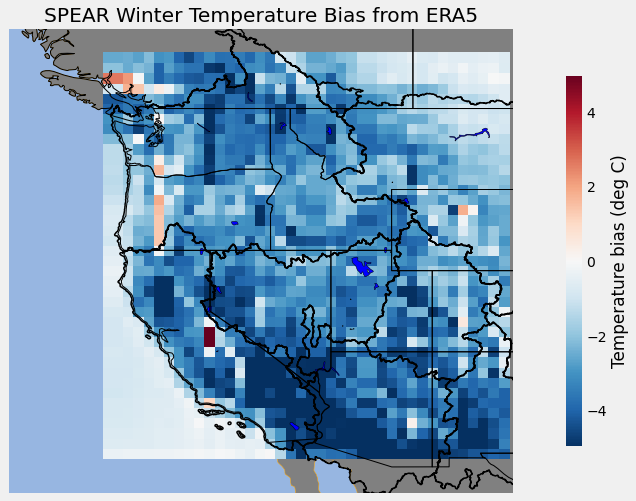

In [66]:
# SPEAR and ERA5
spearforera5=xr.open_dataset("/work/Julian.Schmitt/data/temp_comparison/spear_t_forera5.nc")
era5forspear = xr.open_dataset("/work/Julian.Schmitt/data/temp_comparison/era5_t_forspear.nc")
bias = spearforera5.temp - era5forspear.temp
simple_temp_plot(bias, -5, 5, "SPEAR Winter Temperature Bias from ERA5", "Temperature bias (deg C)",
                "SPEAR_ERA5_bias")

<GeoAxesSubplot:title={'center':'SPEAR Winter Temperature Bias from Livneh'}, xlabel='lon [lon]', ylabel='lat [none]'>

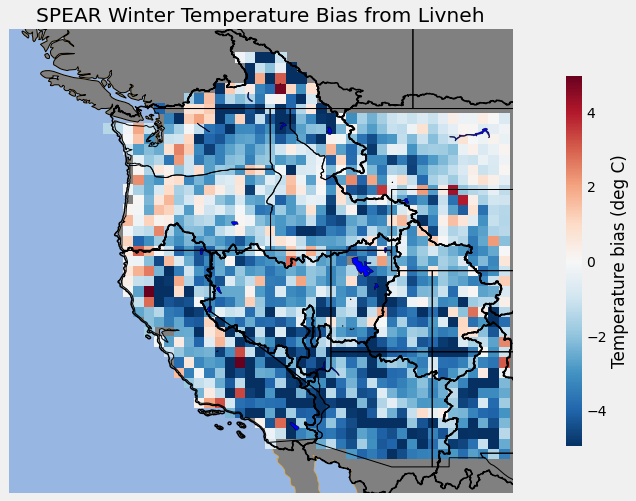

In [67]:
# SPEAR and Livneh
spearforlivneh=xr.open_dataset("/work/Julian.Schmitt/data/temp_comparison/spear_t_forlivneh.nc")
livnehforspear = xr.open_dataset("/work/Julian.Schmitt/data/temp_comparison/livneh_for_spear.nc")
bias = spearforlivneh.temp - livnehforspear.temp
simple_temp_plot(bias, -5, 5, "SPEAR Winter Temperature Bias from Livneh", "Temperature bias (deg C)",
                "SPEAR_LIVNEH_bias")

<GeoAxesSubplot:title={'center':'Livneh Winter Temperature Bias from ERA5'}, xlabel='lon [lon]', ylabel='lat [none]'>

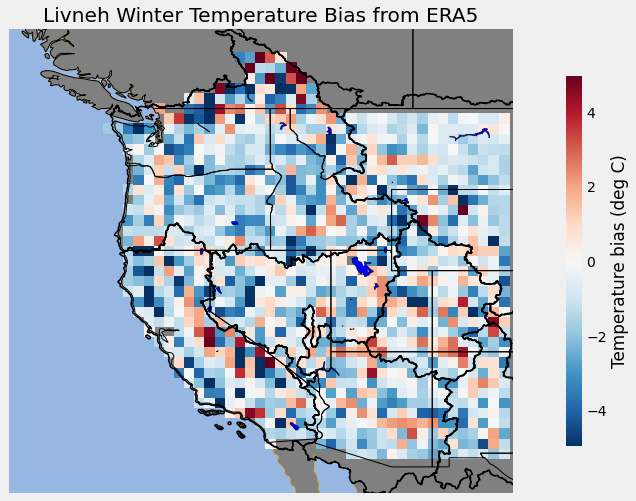

In [68]:
# SPEAR and Livneh
era5forlivneh=xr.open_dataset("/work/Julian.Schmitt/data/temp_comparison/era5_t_forlivneh.nc")
livnehforera5 = xr.open_dataset("/work/Julian.Schmitt/data/temp_comparison/livneh_for_era5.nc")
bias = livnehforera5.temp - era5forlivneh.temp
simple_temp_plot(bias, -5, 5, "Livneh Winter Temperature Bias from ERA5", "Temperature bias (deg C)",
                "Livneh_era5_bias")

<GeoAxesSubplot:title={'center':'Temperature Bias'}, xlabel='lon [lon]', ylabel='lat [none]'>

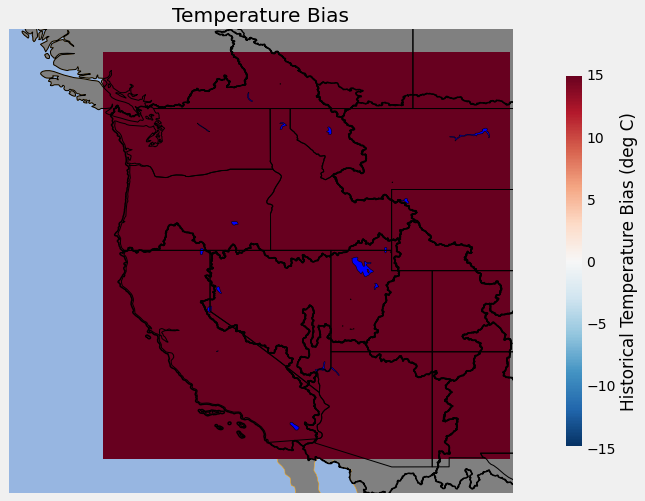

In [48]:
simple_temp_plot(spearforera5.temp-273.15)